In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
colnames=['age',
'workclass',
'fnlwgt',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country',
'income']

In [3]:
income=pd.read_csv("../income/adult.data",header=None)

In [4]:
income.columns=colnames

In [5]:
target=(income['income']==' >50K').astype('int')

In [6]:
income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
income=income.drop(['income'],axis=1)

In [8]:
cont=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

In [9]:
for col in cont:
    income[col]=(income[col]-income[col].min())/(income[col].max()-income[col].min())

In [10]:
cat=[i for i in income.columns if i not in cont]
cat_ind=[i for i in range(len(income.columns)) if income.columns[i] not in cont]


In [11]:
cat

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [12]:
class onehot:
    def __init__(self):
        self.encoder={}
        self.decoder={}
        self.n_cats=0
    def encode(self,col):
        cats=np.unique(col)
        self.n_cats=len(cats)
        n=0
        for i in cats:
            self.encoder[i]=n
            self.decoder[n]=i
            n+=1
        
        output=[]
        for i in col:
            code=[0]*self.n_cats
            code[self.encoder[i]]=1
            output.append(code)
        return np.array(output)
    def decode(self,col):
        output=[]
        card=np.arange(self.n_cats)
        for i in col:
            n=i@card.T
            output.append(self.decoder[n])       
        return output

In [13]:
a=onehot()

In [14]:
o=a.encode(income.values[:,1])
b=a.decode(o)

In [15]:
nrow,ncol=income.values.shape

In [16]:
trans_collect={}
new_data=[]

for col in cat_ind:
    
    name=income.columns[col]
    tran=onehot()
    onehot_vec=tran.encode(income.values[:,col])
    trans_collect[name]=tran
    if new_data==[]:
        new_data=onehot_vec
    else:
        new_data=np.concatenate((new_data,onehot_vec),axis=1)

/home/yicheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


In [17]:
new_data.shape

(32561, 102)

In [18]:
cont_data=income[cont].values

In [19]:
new_data=np.concatenate((new_data,cont_data),axis=1)

In [20]:
# new_data=cont_data

In [21]:
new_data.shape

(32561, 108)

In [22]:
train_x=new_data[:20000]
test_x=new_data[20000:]

train_y=target.values[:20000]
test_y=target.values[20000:]

## Model

In [26]:
model=GSNB()
model.fit(train_x[:,-6:],train_y)

In [27]:
res=model.predict(test_x[:,-6:])

## (1,-1) binary label for adaboost and svm

In [50]:
train_x=train_x
train_y=train_y*2-1
test_x=test_x
test_y=test_y*2-1

# Test

In [24]:
import sys
sys.path.insert(0,'/home/yicheng/DS/Relics/models')

In [23]:
from logistic_regression import logistic_model

In [25]:
from decision_tree import decision_tree

In [32]:
from random_forest import random_forest

In [31]:
from ada_boost import ada_boost

In [24]:
from svm_subgrad import svm_subgrad

In [25]:
from GuassianNB import GSNB

## Error Threshold: 0.24

In [52]:
from sklearn import metrics

train_acc=[]
test_acc=[]

test_auc=[]
for i in range(1,5):
    print(i)
    train_seg=100
    
    #logistic regression
#     model=logistic_model()
    #decision tree
#     model=decision_tree()
    #adaboost
#     model=ada_boost()
    #random forest
#     model=random_forest()
    #svm_subgrad
#     model=svm_subgrad()
#     Guassian NB
    model=GSNB()
    
    #logistic regression
#     model.fit(train_x[:train_seg*i],train_y[:train_seg*i],limit=1e3,verbose=False)
    
    #decision tree
#     model.fit(train_x[:train_seg*i],train_y[:train_seg*i],max_depth=3,min_sample=5)
    
#     ada_boost
#     model.fit(train_x[:train_seg*i],train_y[:train_seg*i],n_iter=3)
    
    #random forest
#     model.fit(train_x[:train_seg*i],train_y[:train_seg*i],n_estimator=10,sample_rate=0.7,max_depth=3,min_sample=5)
    
    #svm_subgrad
    print(train_seg)
#     model.fit(train_x[:train_seg*i],train_y[:train_seg*i],0.01,0.05,500)
    
#   GSNB
    model.fit(train_x,train_y)
    #check training acc
    
    pred=model.predict(train_x[:train_seg*i]) 
    mis=sum(abs((pred>0).astype(int)-train_y[:train_seg*i]))/len(pred)
    train_acc.append(1-mis)
    
    #check testing acc
    
    pred=model.predict(test_x)
    mis=sum(abs((pred>0).astype(int)-test_y))/len(pred)
    test_acc.append(1-mis)
    
    fpr, tpr, thresholds = metrics.roc_curve(test_y, pred, pos_label=1)
    AUC=metrics.auc(fpr, tpr)
    test_auc.append(AUC)
    

1
100
2
100
3
100
4
100


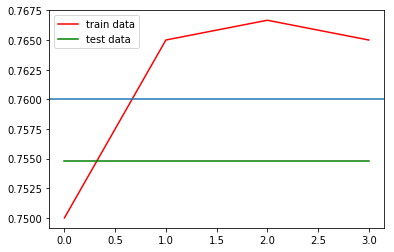

In [53]:
plt.plot(train_acc,color='r',label='train data')
plt.plot(test_acc,color='g',label='test data')
plt.axhline(y=0.76)
plt.legend()

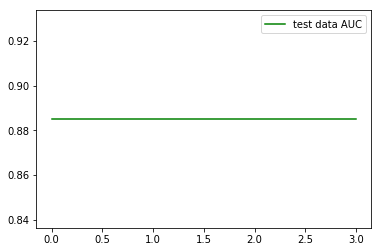

In [54]:
# plt.plot(train_acc,color='r',label='train data')
plt.plot(test_auc,color='g',label='test data AUC')
plt.legend()